# Modelo de machine learning de Arbol de decision

Vamos a utilizar el conjunto de datos de "Wine Quality" disponible en la Universidad de California, Irvine (UCI) Machine Learning Repository. Este conjunto de datos está relacionado con las variantes rojas y blancas del vino portugués "Vinho Verde". Debido a problemas de privacidad y logística, sólo se proporcionan variables físico-químicas (entradas) y sensoriales (la salida) disponibles.

El objetivo de este ejercicio es utilizar un Árbol de Decisión para clasificar la calidad del vino en base a estas variables físico-químicas.

In [1]:
# Importamos las librerias necesarias

import pandas as pd

In [2]:
# Cargamos los datos

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


El próximo paso es explorar y entender mejor nuestros datos. Esto incluirá observar la distribución de la variable de calidad (nuestra variable objetivo) y la creación de un mapa de calor para entender las correlaciones entre las diferentes características de nuestro conjunto de datos.

/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


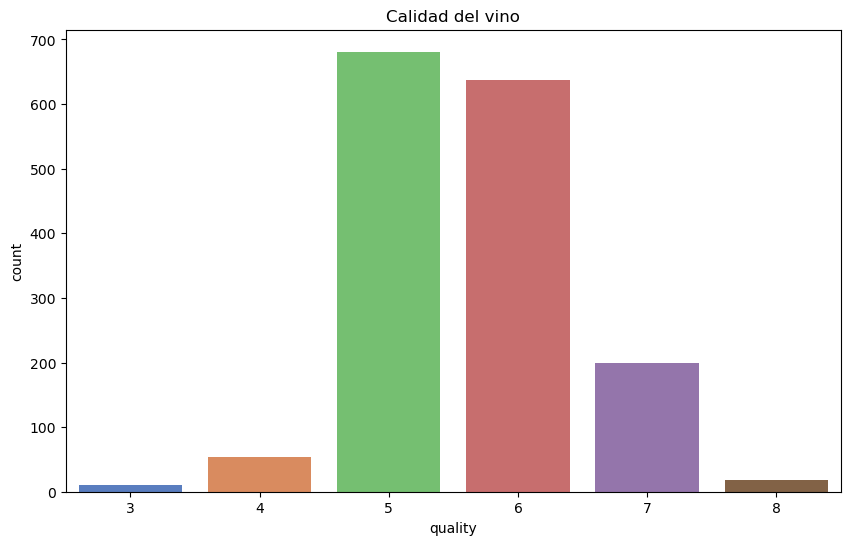

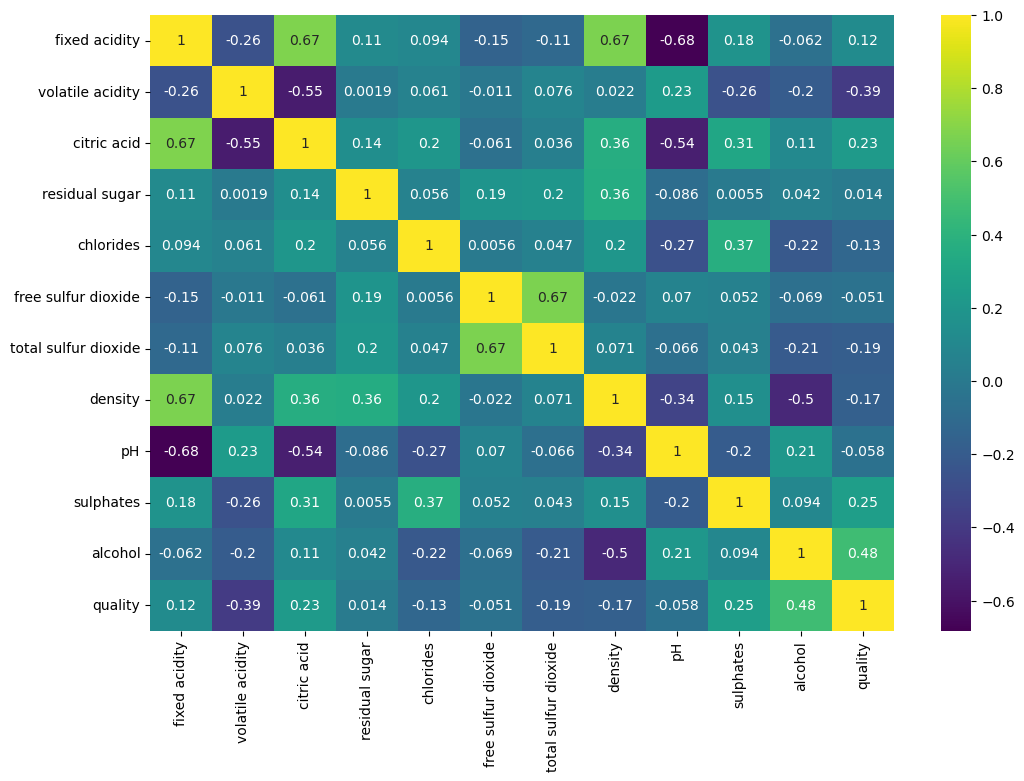

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comprobemos cómo se distribuye la variable de calidad
plt.figure(figsize=(10, 6))
sns.countplot(wine_data['quality'], palette='muted')
plt.title('Calidad del vino')
plt.show()

# Vamos a crear un mapa de calor para entender las correlaciones entre las diferentes características.
corr = wine_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

Ahora que hemos explorado los datos, nuestro próximo paso es preparar los datos para el modelado. Esto implicará dividir los datos en un conjunto de entrenamiento y un conjunto de pruebas, y también normalizar los datos.

Primero, vamos a separar nuestra variable objetivo (quality) del resto de las características.

In [4]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

Ahora vamos a dividir nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas. Esto nos permitirá entrenar nuestro modelo en un conjunto de datos y luego probar su rendimiento en un conjunto de datos no visto. Para esto, utilizaremos la función train_test_split de sklearn.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finalmente, vamos a normalizar nuestros datos. La normalización es un paso importante en muchos algoritmos de aprendizaje automático, ya que puede mejorar la velocidad de entrenamiento y, a veces, también el rendimiento del modelo. Para este fin, vamos a utilizar el StandardScaler de sklearn.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ahora que ya tenemos nuestros datos preparados, vamos a crear nuestro modelo de Árbol de Decisión. Los Árboles de Decisión son un tipo de algoritmo de aprendizaje supervisado que se utiliza principalmente para problemas de clasificación, aunque también puede utilizarse para problemas de regresión.

En este caso, vamos a utilizar la implementación de sklearn de un árbol de decisión, llamado DecisionTreeClassifier.

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo

model = DecisionTreeClassifier(random_state=42)

In [8]:
# Entrenamos el modelo

model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Ahora que nuestro modelo ha sido entrenado, es hora de evaluar qué tan bien está funcionando. Para hacer esto, vamos a predecir los valores de nuestros datos de prueba y luego comparar esas predicciones con los valores reales.

In [9]:
# Predecimos los valores de nuestro conjunto de prueba

y_pred = model.predict(X_test_scaled)

In [10]:
# Evaluamos el rendimiento de nuestro modelo

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.68      0.66       130
           6       0.55      0.54      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.55      0.56      0.56       320

[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 39 71 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]
0.5625


La precisión es una métrica que nos dice qué porcentaje de nuestras predicciones fueron correctas. Una precisión más alta significa que nuestro modelo es mejor para predecir los resultados.

El último paso que generalmente tomamos al construir un modelo de aprendizaje automático es visualizar el árbol de decisiones. Esto puede ayudar a entender cómo el modelo está tomando sus decisiones.

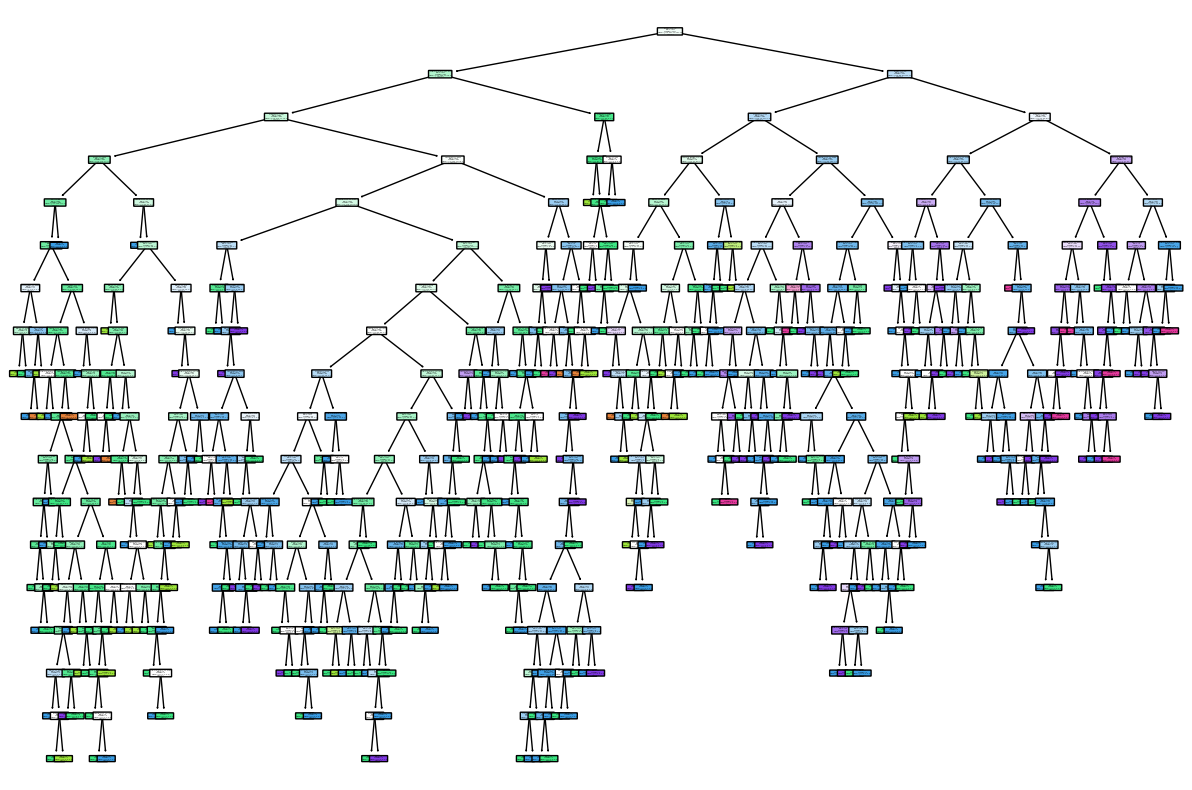

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(model, filled=True, rounded=True,
          feature_names=X.columns, class_names=[str(i) for i in model.classes_])
plt.show()